In [18]:
import pickle
objects = []
with (open("generated_htmls.pkl", "rb")) as f:
    htmls = pickle.load(f)

In [21]:
from utils.single_similarity import calculate_metrics

pairs = []
for i in range(7):
    metrics = calculate_metrics(htmls[i], str(i + 1) + '.png', 393, 852)
    print('Design ' + str(i + 1), metrics)

    pairs.append((metrics['perceptual_loss'], metrics['similarity'], str(i + 1) + '.png', metrics['predicted_screenshot_path']))

Design 1 {'similarity': 1.0, 'perceptual_loss': 0.0, 'predicted_screenshot_path': 'workspace/predictedde1202f0423c44d1ba8025a1fef06b4d.png'}
Design 2 {'similarity': 1.0, 'perceptual_loss': 0.0, 'predicted_screenshot_path': 'workspace/predictede288a61eee7340c0b07e64c086eefcbc.png'}
Design 3 {'similarity': 0.9734251416391797, 'perceptual_loss': 0.197219118475914, 'predicted_screenshot_path': 'workspace/predicted4b6788a04fac47489a40b349ae4612eb.png'}
Design 4 {'similarity': 0.9370817620721128, 'perceptual_loss': 0.347982257604599, 'predicted_screenshot_path': 'workspace/predicteda1e8c3e9a70549c69e751e32da47f1b4.png'}
Design 5 {'similarity': 0.883619699627161, 'perceptual_loss': 0.5415420532226562, 'predicted_screenshot_path': 'workspace/predictedf8793b297e7c4e22ae61bc75cd6fe60a.png'}
Design 6 {'similarity': 0.8668353648649322, 'perceptual_loss': 0.8161349296569824, 'predicted_screenshot_path': 'workspace/predicted07f30bf831194a609e00985ec20adf2e.png'}
Design 7 {'similarity': 0.86885317663

In [10]:
!open workspace/predicted6e9938f1a9844effb7d39f983df367b9.png

In [5]:
import pickle
objects = []
with (open("generated_htmls_lower_temp_50_stop_svg_2.pkl", "rb")) as f:
    htmls = pickle.load(f)

for html in htmls[6]:
    if 'svg' in html:
        print(html)
        break

# for i in range(7):
#     for j, html in enumerate(htmls[i]):
#         with open('htmls/all2/' + str(i + 1) + '-' + str(j + 1) + '.html', 'w') as f:
#             f.write(html)

<body><div id="7"><div id="Rectangle"></div><div id="My-Page">My Page</div><div id="Rectangle"></div><div id="Lorem-ipsum-dolor-si">Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.</div><div id="Bitmap"></div><div id="Group"><div id="Rectangle"></div><div id="Your-email-here">Your email here</div></div><div id="Group-2"><div id="Rectangle"></div><div id="Sign-up">Sign up</div></div><div id="Group-3"><div id="Rectangle"></div><div id="Rectangle"></div><div id="Rectangle"></div></div></div></body>

<style>

@font-face {
  font-family: 'Arial-BoldMT';
  src: url('https://www.florenceandthefox.com/fonts/Arial-BoldMT.eot');
  src: url('https://www.florenceandthefox.com/fonts/Arial-BoldMT.eot?#iefix') format('embedded-opentype'),
       url('https://www.florenceandthefox.com/fonts/Arial-BoldMT.woff2') format('wo

In [6]:
from utils.single_similarity import calculate_metrics

pairs = []
pairs_no_svg = []
svg_counters = [0] * 7

for i in range(7):
    current_best = None
    current_best_no_svg = None
    for html in htmls[i]:
        metrics = calculate_metrics(html, str(i + 1) + '.png', 393, 852)
        if metrics is None:
            continue

        if current_best is None or metrics['perceptual_loss'] < current_best['perceptual_loss']:
            current_best = metrics

        if metrics['has_large_svg']:
            svg_counters[i] += 1
        else:
            if current_best_no_svg is None or metrics['perceptual_loss'] < current_best_no_svg['perceptual_loss']:
                current_best_no_svg = metrics

    if current_best is not None:
        pairs.append((current_best['perceptual_loss'], current_best['similarity'], str(i + 1) + '.png', current_best['predicted_screenshot_path']))
    if current_best_no_svg is not None:
        pairs_no_svg.append((current_best_no_svg['perceptual_loss'], current_best_no_svg['similarity'], str(i + 1) + '.png', current_best_no_svg['predicted_screenshot_path']))

    print('Design ' + str(i + 1), current_best)
    print('Design ' + str(i + 1) + ' (no SVG)', current_best_no_svg)
    print('SVG count', svg_counters[i])

Design 1 {'similarity': 1.0, 'perceptual_loss': 0.0, 'has_large_svg': False, 'predicted_screenshot_path': 'workspace/predictedc3b614abf9f24cc7829c50c1443f9795.png'}
Design 1 (no SVG) {'similarity': 1.0, 'perceptual_loss': 0.0, 'has_large_svg': False, 'predicted_screenshot_path': 'workspace/predictedc3b614abf9f24cc7829c50c1443f9795.png'}
SVG count 0
Design 2 {'similarity': 1.0, 'perceptual_loss': 0.0, 'has_large_svg': False, 'predicted_screenshot_path': 'workspace/predicted77e19e867a974d12bc3e3714d0c4539c.png'}
Design 2 (no SVG) {'similarity': 1.0, 'perceptual_loss': 0.0, 'has_large_svg': False, 'predicted_screenshot_path': 'workspace/predicted77e19e867a974d12bc3e3714d0c4539c.png'}
SVG count 0
Design 3 {'similarity': 0.9729002275400691, 'perceptual_loss': 0.18113106489181519, 'has_large_svg': False, 'predicted_screenshot_path': 'workspace/predictedb2311fa8a9b14ad0828fad6e5b1bfc01.png'}
Design 3 (no SVG) {'similarity': 0.9729002275400691, 'perceptual_loss': 0.18113106489181519, 'has_larg

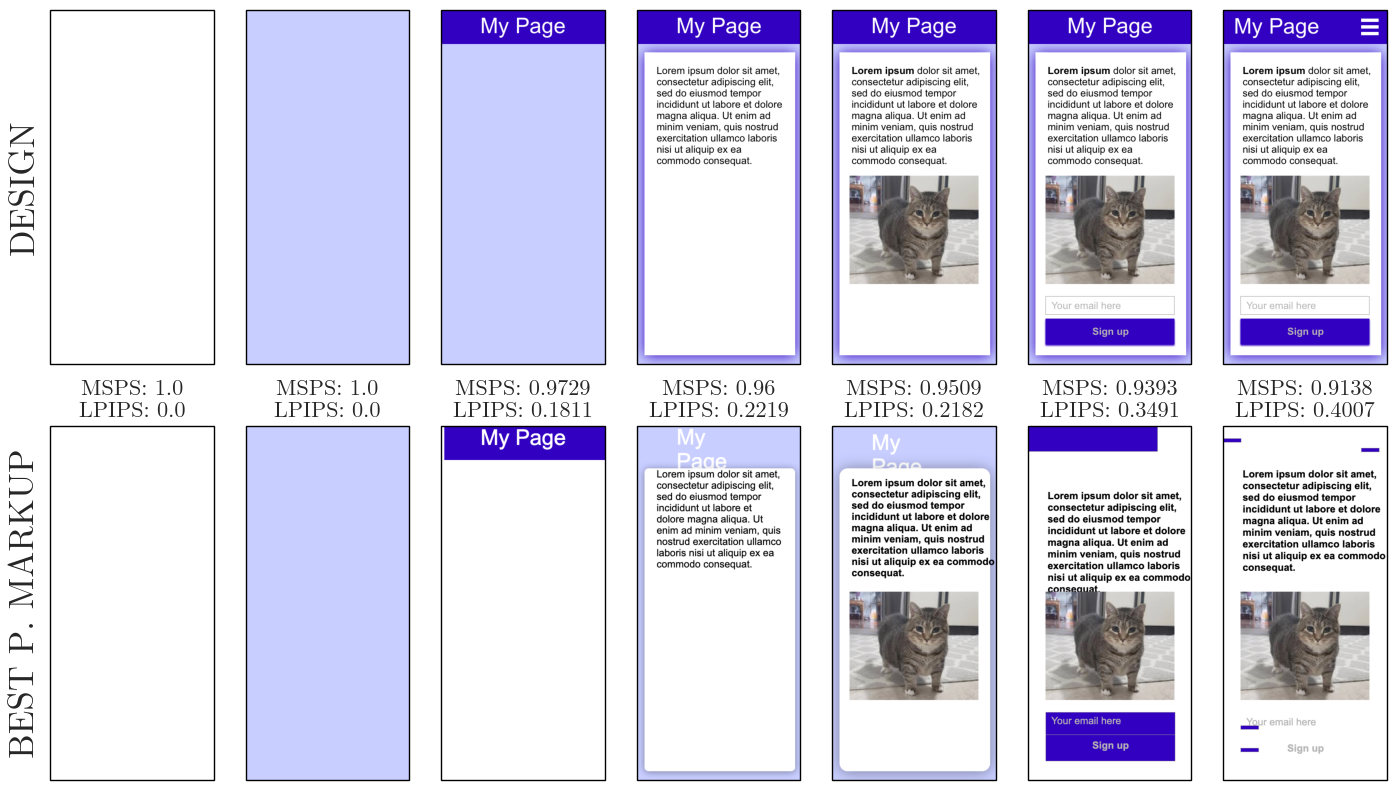

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

font = {'fontname':'CMU Serif'}
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.style.use('seaborn-v0_8-colorblind')

rows, cols = 2, len(pairs)
fig, axes = plt.subplots(rows, cols,
                         figsize=(2*cols, 4*rows),
                         squeeze=False)

# -----------------------------------------------------------------------
# populate the grid
for c, (lpips, msps, exp_img, pred_img) in enumerate(pairs):
    exp_img = plt.imread(exp_img)
    pred_img = plt.imread(pred_img)

    axes[0, c].imshow(exp_img)
    axes[1, c].imshow(pred_img)
    axes[0, c].axis("off")
    axes[1, c].axis("off")
    axes[1, c].set_title(f"MSPS: {msps:,.4}\nLPIPS: {lpips:,.4}", fontsize=16)

    for ax in [axes[0, c], axes[1, c]]:
        rect = plt.Rectangle(
            (0, 0), 1, 1,
            linewidth=1,
            edgecolor="black",
            facecolor="none",
            transform=ax.transAxes,               # so 0–1 spans the axes
            clip_on=False                         # draw outside the image
        )
        ax.add_patch(rect)

# -----------------------------------------------------------------------
# 1. do the automatic layout first
fig.tight_layout()
# 2. then give ourselves some breathing room on the left & bottom
fig.subplots_adjust(left=0.02) # space for the column labels

# -----------------------------------------------------------------------
# vertical row labels (figure coords, so they never move again)
row_labels = ["DESIGN", "BEST P. MARKUP"]
for r, label in enumerate(row_labels):
    bounds = axes[r, 0].get_position().bounds
    y_center = bounds[1] + bounds[3] / 2

    fig.text(0.01, y_center,
             label, ha="center", va="center",
             rotation="vertical",
             fontsize=25)

plt.savefig('design-test-50-lower-temp-2.png', dpi=300)
plt.show()


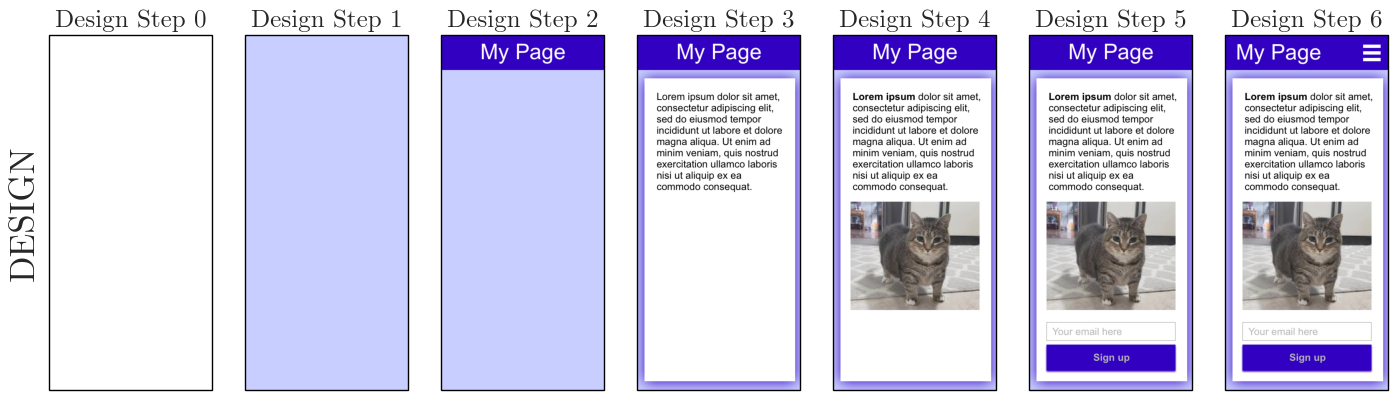

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

font = {'fontname':'CMU Serif'}
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.style.use('seaborn-v0_8-colorblind')

rows, cols = 1, len(pairs)
fig, axes = plt.subplots(rows, cols,
                         figsize=(2*cols, 4*rows),
                         squeeze=False)

# -----------------------------------------------------------------------
# populate the grid
for c, (lpips, msps, exp_img, pred_img) in enumerate(pairs):
    exp_img = plt.imread(exp_img)

    axes[0, c].imshow(exp_img)
    axes[0, c].axis("off")
    axes[0, c].set_title(f"Design Step {c}", fontsize=18)

    for ax in [axes[0, c]]:
        rect = plt.Rectangle(
            (0, 0), 1, 1,
            linewidth=1,
            edgecolor="black",
            facecolor="none",
            transform=ax.transAxes,               # so 0–1 spans the axes
            clip_on=False                         # draw outside the image
        )
        ax.add_patch(rect)

# -----------------------------------------------------------------------
# 1. do the automatic layout first
fig.tight_layout()
# 2. then give ourselves some breathing room on the left & bottom
fig.subplots_adjust(left=0.02) # space for the column labels

# -----------------------------------------------------------------------
# vertical row labels (figure coords, so they never move again)
row_labels = ["DESIGN"]
for r, label in enumerate(row_labels):
    bounds = axes[r, 0].get_position().bounds
    y_center = bounds[1] + bounds[3] / 2

    fig.text(0.01, y_center,
             label, ha="center", va="center",
             rotation="vertical",
             fontsize=25)

plt.savefig('design-originals.png', dpi=300)
plt.show()


In [29]:
pairs

[(0.0,
  1.0,
  '1.png',
  'workspace/predicted779a39a30c244f64ad409229d8c22595.png'),
 (0.0,
  1.0,
  '2.png',
  'workspace/predicted0b29fbc903564e999fa73b94ebcc8eac.png'),
 (0.0687810629606247,
  0.992428535128258,
  '3.png',
  'workspace/predicted9508dbf3ae4a459785a3ee021c22b31d.png'),
 (0.1765383780002594,
  0.974286371750673,
  '4.png',
  'workspace/predicted27828fd98b0b42e3ae377afb76849a06.png'),
 (0.23405222594738007,
  0.9694722263157018,
  '5.png',
  'workspace/predictedc7a6b63589744698aaf183782c858fc0.png'),
 (0.25546959042549133,
  0.9648954466699959,
  '6.png',
  'workspace/predicted5cab6626be0049f5ba62628ba62159de.png'),
 (0.43640244007110596,
  0.9053589136650165,
  '7.png',
  'workspace/predicted7a45c1cd735142af8728a4f6b54679fb.png')]